In [1]:
import sys ; sys.path.insert(0, '../')
from notebook_tools import *
%matplotlib inline
sigma = np.array([0 , 100 , 141 , 159 , 156])
sigma_err = np.array([0 , 20 , 5 , 7 , 16])

sigma2 = np.square(sigma)
sigma2_err = 2*sigma*sigma_err

# // Fomin no c.m. corrections
a2 = np.array([1, 3.6 , 4.75 ,  5.21 , 5.16 ])
a2_err = np.array([0 , 0.1 , 0.16, 0.2, 0.22])


a2_He3 = np.array([1.97 ])
a2_He3_err = np.array([0.1])
sigma_He3 = np.array([68])
sigma_He3_err = np.array([10])

In [2]:
ColleCalc = pd.DataFrame({'a2':[ 3.80 , 4.75, 5.58 , 5.29 ],
                          'A':[ 4 , 12 , 56 , 208],
                        'allpairs':[110,140,146,145],
                        'nl00':[110,156,172,178]},
                         index = ['$^{4}$He','$^{12}$C','$^{56}$Fe','$^{208}$Pb'])

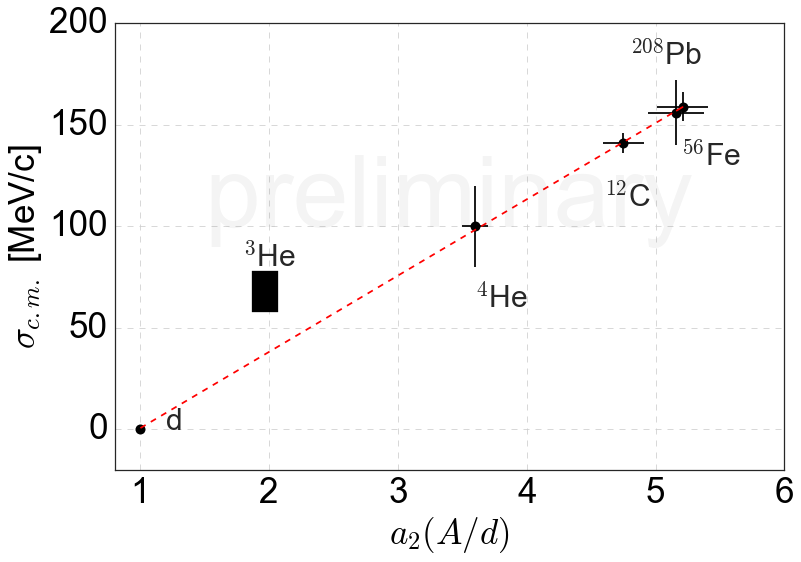

In [8]:
import matplotlib.patches as patches
fig,ax=plt.subplots(figsize=(12,8))
plt.errorbar(a2,sigma,xerr=a2_err,yerr=sigma_err,fmt='o',color='black',markersize=10)#,label='data'
# plt.errorbar(a2_He3,sigma_He3,xerr=a2_He3_err,yerr=sigma_He3_err,fmt='s',markersize=20)#,label='data'
ax.add_patch(
    patches.Rectangle(
        (a2_He3-a2_He3_err, sigma_He3-sigma_He3_err),   # (x,y)
        a2_He3_err*2,          # width
        sigma_He3_err*2,          # height    
        color='black'
    )
)
p = np.poly1d(np.polyfit(x=a2,y=sigma,deg=1))
plt.plot(a2,p(a2),'--',color='red')
# plt.plot(ColleCalc['a2'],ColleCalc['allpairs'],'s',color='red',label='Colle, all pairs')
# plt.plot(ColleCalc['a2'],ColleCalc['nl00'],'v',color='black',label='Colle, n,l=0,0')
# plt.legend(loc='best',fontsize=20)
set_axes(ax,'$a_2 (A/d)$','$\\sigma_{c.m.}$ [MeV/c]'
         ,xlim=(0.8,6),ylim=(-20,200),do_add_grid=True,fontsize=35)
fontsize = 30
plt.text(1.2,0,'d',fontsize=fontsize)
plt.text(1.8,80,'$^3$He',fontsize=fontsize)
plt.text(3.6,60,'$^4$He',fontsize=fontsize)
plt.text(4.6,110,'$^{12}$C',fontsize=fontsize)
plt.text(5.2,130,'$^{56}$Fe',fontsize=fontsize)
plt.text(4.8,180,'$^{208}$Pb',fontsize=fontsize)
plt.text(1.5,100,'preliminary',fontsize=100,alpha=0.05)
plt.savefig('/Users/erezcohen/Desktop/Projects/2NSRC/ppCMpaper/Figures/a2_vs_sigma.pdf')